In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load Data
df = pd.read_csv('LSTM2.csv')
df.head()


In [ ]:
#data cleaning
df["Date"] = pd.to_datetime(df["Date"])
df = df.fillna(df.bfill())

In [ ]:
train = df[:-225]
len(train)
test = df[-225:]
len(test)
train

,Date,MV1,MV2,MV3,MV4,MV5,MV6,DV1,DV2,DV3,...,CV12,CV13,CV14,CV15,CV16,CV17,CV18,CV19,CV20,CV21
0,2019-07-15 06:00:00,52.277210,64.287964,63.809814,59.865784,61.913475,66.762009,63.723587,59.025074,62.884781,...,71.965919,61.039867,5.020176,37.141636,8.587229,49.800625,51.349411,253.287277,256.786987,186.118744
1,2019-07-15 06:01:00,52.317898,63.936993,60.539707,61.055756,62.912544,66.227531,63.912422,58.774059,59.916000,...,72.044914,61.039867,5.023095,37.146816,9.078000,50.662010,52.806980,263.942993,257.847504,177.065628
2,2019-07-15 06:02:00,52.418480,63.602665,65.157608,58.501160,63.257046,66.635620,66.385277,58.622467,61.299221,...,72.123909,61.039867,5.024466,37.151997,8.762221,50.008530,51.418224,266.671234,258.907989,163.507019
3,2019-07-15 06:03:00,52.592255,61.956985,62.561069,67.342506,60.901077,68.507271,64.597672,58.094593,61.792000,...,72.202904,61.039867,5.025836,37.157177,8.851793,49.959808,51.484638,261.741211,259.968506,166.532349
4,2019-07-15 06:04:00,52.766033,62.833214,63.129795,68.693382,63.470730,70.762321,62.810074,57.183628,60.605404,...,72.281906,61.039867,5.027206,37.162357,9.061394,49.275852,49.838829,260.339172,259.835999,180.707794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2019-07-17 02:11:00,56.341396,67.377289,73.524681,61.237568,67.009117,70.438782,65.113884,59.076206,62.246506,...,62.045738,57.000000,5.033933,36.131626,8.649062,49.679138,46.637634,238.626144,241.862076,0.000000
2652,2019-07-17 02:12:00,56.330780,61.454910,73.084457,60.600243,64.410637,68.501503,61.818024,58.719425,61.240997,...,62.023216,57.000000,5.033187,36.143635,8.277056,49.607384,46.552914,235.892349,242.810822,0.000000
2653,2019-07-17 02:13:00,56.320168,77.261787,66.473808,63.463284,63.211720,68.845673,63.695648,58.362644,61.490517,...,62.000698,57.000000,5.027469,36.155640,8.801664,49.795456,46.781971,235.504410,243.166626,0.000000
2654,2019-07-17 02:14:00,56.309555,74.685158,71.614532,66.097687,63.763374,67.699326,64.087593,58.005863,62.896515,...,61.978176,57.000000,5.021750,36.167648,9.101017,49.983524,47.011032,235.116470,240.470734,0.000000


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['CV1'].values.reshape(-1,1))

prediction_rows = 225

x_train = []
y_train = []

for x in range(prediction_rows, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_rows:x, 0])
    y_train.append(scaled_data[x, 0])


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next value


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train, y_train, epochs = 20, batch_size=32, validation_split=0.1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 225, 128)          66560     
                                                                 
 dropout_6 (Dropout)         (None, 225, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 225, 128)          131584    
                                                                 
 dropout_7 (Dropout)         (None, 225, 128)          0         
                                                                 
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                

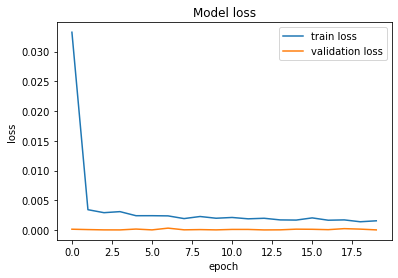

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

In [ ]:
actual_temp = test['CV1'].values
total_temp = pd.concat((train['CV1'], test['CV1']),axis=0)

model_inputs = total_temp[len(total_temp)-len(test)-prediction_rows:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


# Make Predictions on Test Data
x_test = []

for x in range(prediction_rows, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_rows:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)



In [ ]:
pred

array([[56.181927],
       [56.176746],
       [56.170643],
       [56.163395],
       [56.154613],
       [56.143944],
       [56.131123],
       [56.11599 ],
       [56.098682],
       [56.07925 ],
       [56.05807 ],
       [56.035194],
       [56.010838],
       [55.985497],
       [55.959877],
       [55.934364],
       [55.90939 ],
       [55.885666],
       [55.86364 ],
       [55.8434  ],
       [55.824978],
       [55.808372],
       [55.79353 ],
       [55.78045 ],
       [55.769073],
       [55.75935 ],
       [55.75118 ],
       [55.744434],
       [55.738953],
       [55.73456 ],
       [55.731068],
       [55.728317],
       [55.726128],
       [55.72458 ],
       [55.723915],
       [55.724445],
       [55.72647 ],
       [55.730247],
       [55.735954],
       [55.743694],
       [55.7535  ],
       [55.76532 ],
       [55.779156],
       [55.794983],
       [55.812496],
       [55.831333],
       [55.851414],
       [55.87231 ],
       [55.893597],
       [55.91499 ],


In [ ]:
test

,Date,MV1,MV2,MV3,MV4,MV5,MV6,DV1,DV2,DV3,...,CV12,CV13,CV14,CV15,CV16,CV17,CV18,CV19,CV20,CV21
2656,2019-07-17 02:16:00,56.288326,82.199188,60.274269,61.003098,63.052464,66.469719,62.123032,58.271866,61.938431,...,61.933136,57.0,5.010314,36.191666,8.590693,50.359665,48.188675,234.340576,239.904007,0.000000
2657,2019-07-17 02:17:00,56.275768,82.965134,67.579803,62.309692,63.049538,66.789009,65.572411,56.624893,62.222321,...,61.910614,57.0,5.004596,36.203674,8.380397,50.547737,49.224129,237.862991,241.102127,0.000000
2658,2019-07-17 02:18:00,56.250229,83.703903,63.774479,61.167374,64.230125,68.498764,63.270237,57.784397,60.543938,...,61.888096,57.0,4.998878,36.215683,8.961876,50.663219,49.331734,242.611877,242.300247,0.000000
2659,2019-07-17 02:19:00,56.226944,78.250511,61.802471,66.493454,63.983536,68.457893,65.203728,58.717251,64.585831,...,61.888390,57.0,4.993159,36.227692,9.097096,50.643894,49.439339,242.510223,243.498367,0.000000
2660,2019-07-17 02:20:00,56.203663,82.081322,63.884159,61.086624,63.432919,69.472298,65.953545,56.688671,60.807713,...,61.900093,57.0,4.987441,36.239815,8.781799,50.624569,49.773483,242.408585,242.944107,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,2019-07-17 05:56:00,55.190853,74.550720,67.938644,62.065792,64.723473,70.083252,63.863182,58.253620,63.146145,...,63.847939,57.0,4.992320,37.403282,9.189766,50.365089,49.560238,246.011520,242.325241,39.149422
2877,2019-07-17 05:57:00,55.227337,72.711426,65.703979,61.065582,65.517853,71.132271,63.496212,59.505360,62.988712,...,63.844017,57.0,4.987756,37.420185,9.406961,50.251949,49.460434,246.993210,241.133957,53.883652
2878,2019-07-17 05:58:00,55.265198,67.358078,69.639542,67.481941,65.038628,70.149101,64.856758,58.507404,65.181908,...,63.840099,57.0,4.983193,37.404160,9.570182,50.138805,49.308575,247.079040,241.074341,23.928591
2879,2019-07-17 05:59:00,55.313534,67.199921,67.828743,60.618103,64.897087,70.393768,64.213303,57.561810,64.682495,...,63.836178,57.0,4.978630,37.342026,9.376427,50.025665,49.006802,247.164886,241.014740,0.135384


In [ ]:
test.reset_index(inplace=True, drop=False)

In [ ]:
test


,Date,MV1,MV2,MV3,MV4,MV5,MV6,DV1,DV2,DV3,...,CV12,CV13,CV14,CV15,CV16,CV17,CV18,CV19,CV20,CV21
0,2019-07-17 02:16:00,56.288326,82.199188,60.274269,61.003098,63.052464,66.469719,62.123032,58.271866,61.938431,...,61.933136,57.0,5.010314,36.191666,8.590693,50.359665,48.188675,234.340576,239.904007,0.000000
1,2019-07-17 02:17:00,56.275768,82.965134,67.579803,62.309692,63.049538,66.789009,65.572411,56.624893,62.222321,...,61.910614,57.0,5.004596,36.203674,8.380397,50.547737,49.224129,237.862991,241.102127,0.000000
2,2019-07-17 02:18:00,56.250229,83.703903,63.774479,61.167374,64.230125,68.498764,63.270237,57.784397,60.543938,...,61.888096,57.0,4.998878,36.215683,8.961876,50.663219,49.331734,242.611877,242.300247,0.000000
3,2019-07-17 02:19:00,56.226944,78.250511,61.802471,66.493454,63.983536,68.457893,65.203728,58.717251,64.585831,...,61.888390,57.0,4.993159,36.227692,9.097096,50.643894,49.439339,242.510223,243.498367,0.000000
4,2019-07-17 02:20:00,56.203663,82.081322,63.884159,61.086624,63.432919,69.472298,65.953545,56.688671,60.807713,...,61.900093,57.0,4.987441,36.239815,8.781799,50.624569,49.773483,242.408585,242.944107,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2019-07-17 05:56:00,55.190853,74.550720,67.938644,62.065792,64.723473,70.083252,63.863182,58.253620,63.146145,...,63.847939,57.0,4.992320,37.403282,9.189766,50.365089,49.560238,246.011520,242.325241,39.149422
221,2019-07-17 05:57:00,55.227337,72.711426,65.703979,61.065582,65.517853,71.132271,63.496212,59.505360,62.988712,...,63.844017,57.0,4.987756,37.420185,9.406961,50.251949,49.460434,246.993210,241.133957,53.883652
222,2019-07-17 05:58:00,55.265198,67.358078,69.639542,67.481941,65.038628,70.149101,64.856758,58.507404,65.181908,...,63.840099,57.0,4.983193,37.404160,9.570182,50.138805,49.308575,247.079040,241.074341,23.928591
223,2019-07-17 05:59:00,55.313534,67.199921,67.828743,60.618103,64.897087,70.393768,64.213303,57.561810,64.682495,...,63.836178,57.0,4.978630,37.342026,9.376427,50.025665,49.006802,247.164886,241.014740,0.135384


In [ ]:
CV1_pred=pd.DataFrame(pred)
CV1_pred.columns=['CV1_pred']
CV1_pred

,CV1_pred
0,56.181927
1,56.176746
2,56.170643
3,56.163395
4,56.154613
...,...
220,54.683655
221,54.696228
222,54.710815
223,54.727203


In [ ]:
test.drop_duplicates(subset=['index'], keep=False,inplace=True)
test.drop(['index'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data=pd.concat((CV1_pred,test['CV1']),axis=1)
data

,CV1_pred,CV1
0,56.181927,56.288326
1,56.176746,56.275768
2,56.170643,56.250229
3,56.163395,56.226944
4,56.154613,56.203663
...,...,...
220,54.683655,55.190853
221,54.696228,55.227337
222,54.710815,55.265198
223,54.727203,55.313534


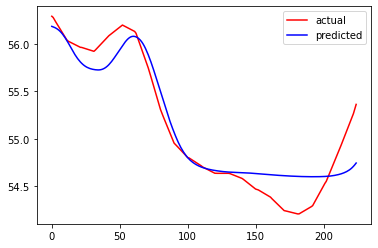

In [ ]:
plt.plot(data['CV1'],label='actual',color='red')
plt.plot(data['CV1_pred'],label='predicted',color='blue')
plt.legend()